In [3]:
from pathlib import Path

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Point this to your directory of RGBA images
image_dir = Path("/home/ubuntu/a100-gaussian-avatar/gaussian_avatar/datasets/people_snapshot_corrected/male-4-casual/cam000/images")

extensions = {".png", ".tiff", ".tif", ".webp"}
paths = sorted(p for p in image_dir.iterdir() if p.suffix.lower() in extensions)
print(f"Found {len(paths)} images in {image_dir}")

Found 872 images in /home/ubuntu/a100-gaussian-avatar/gaussian_avatar/datasets/people_snapshot_corrected/male-4-casual/cam000/images


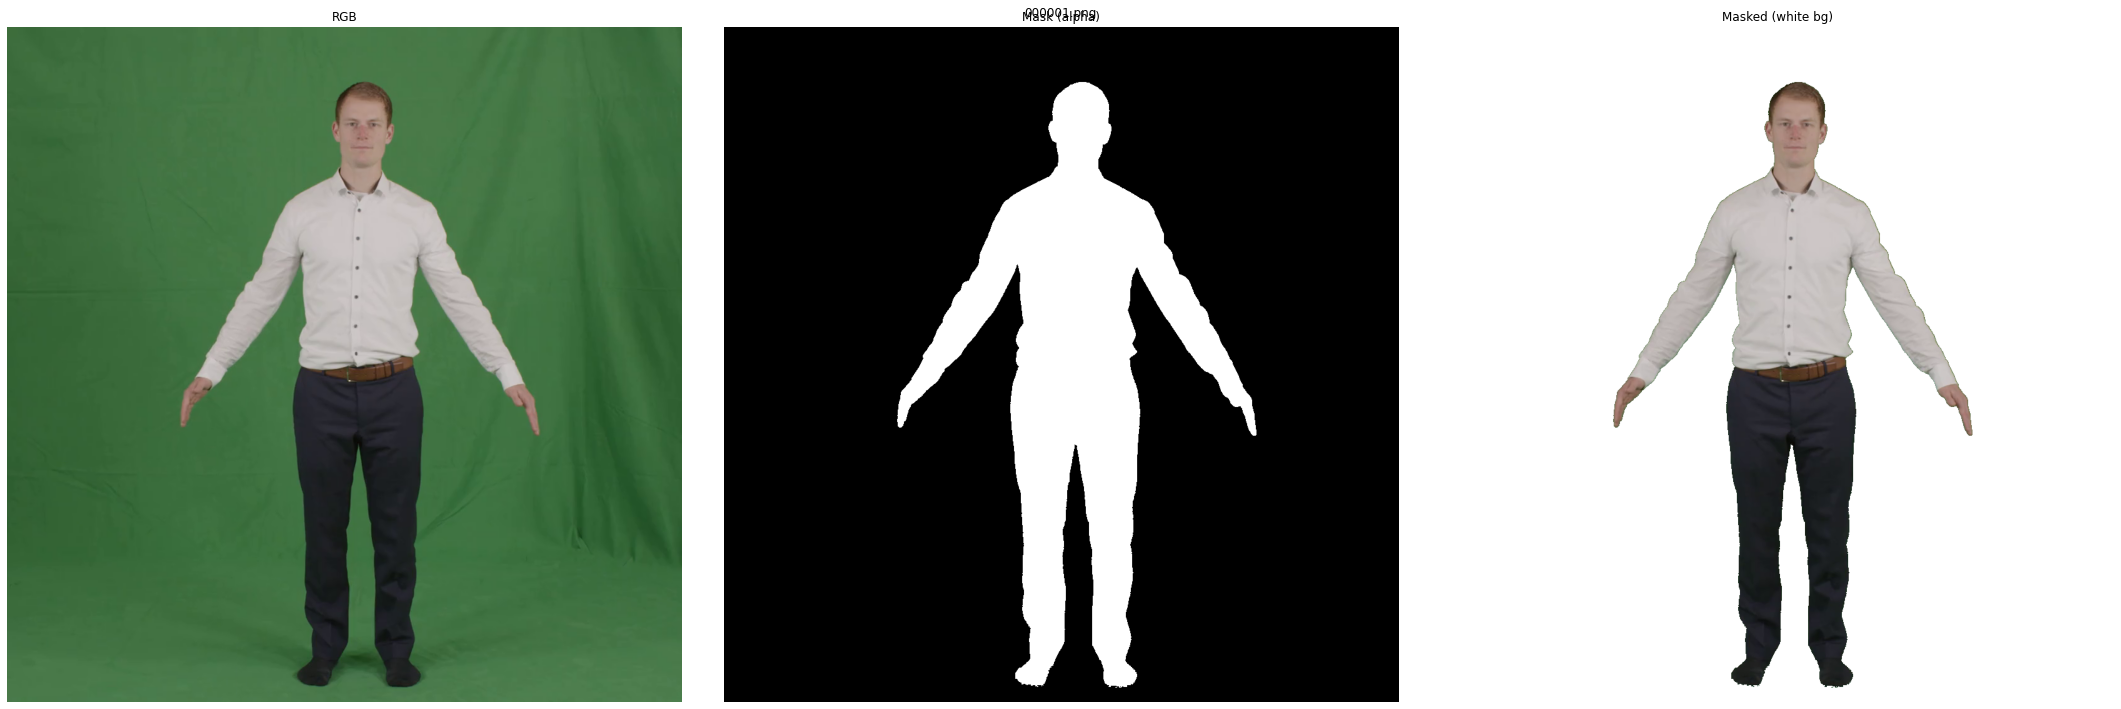

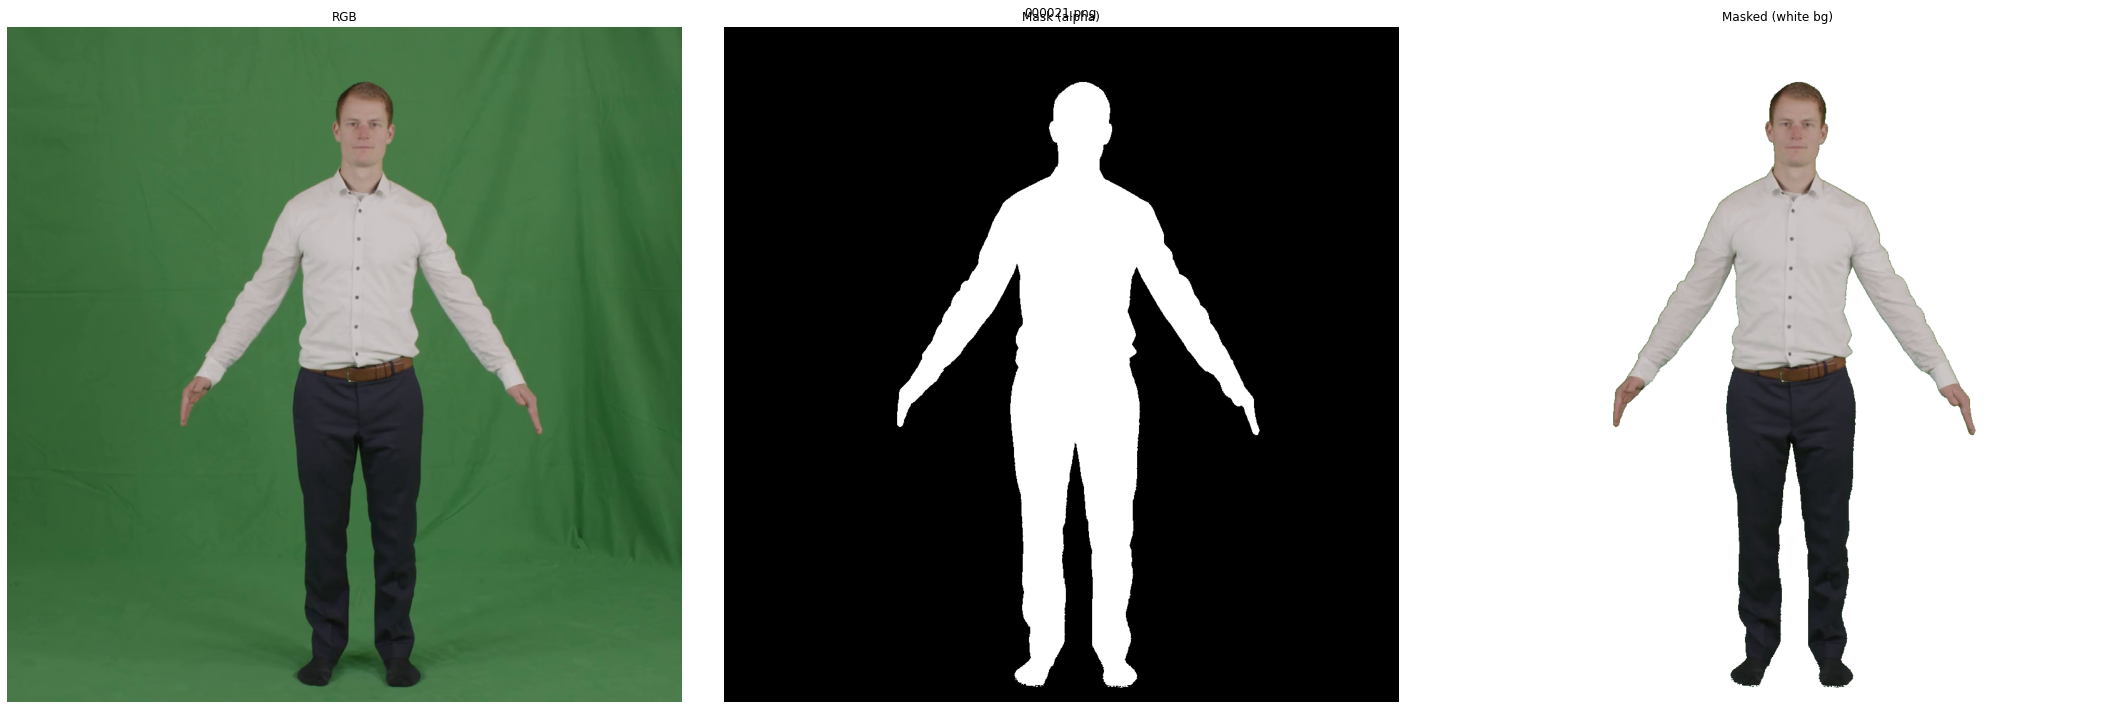

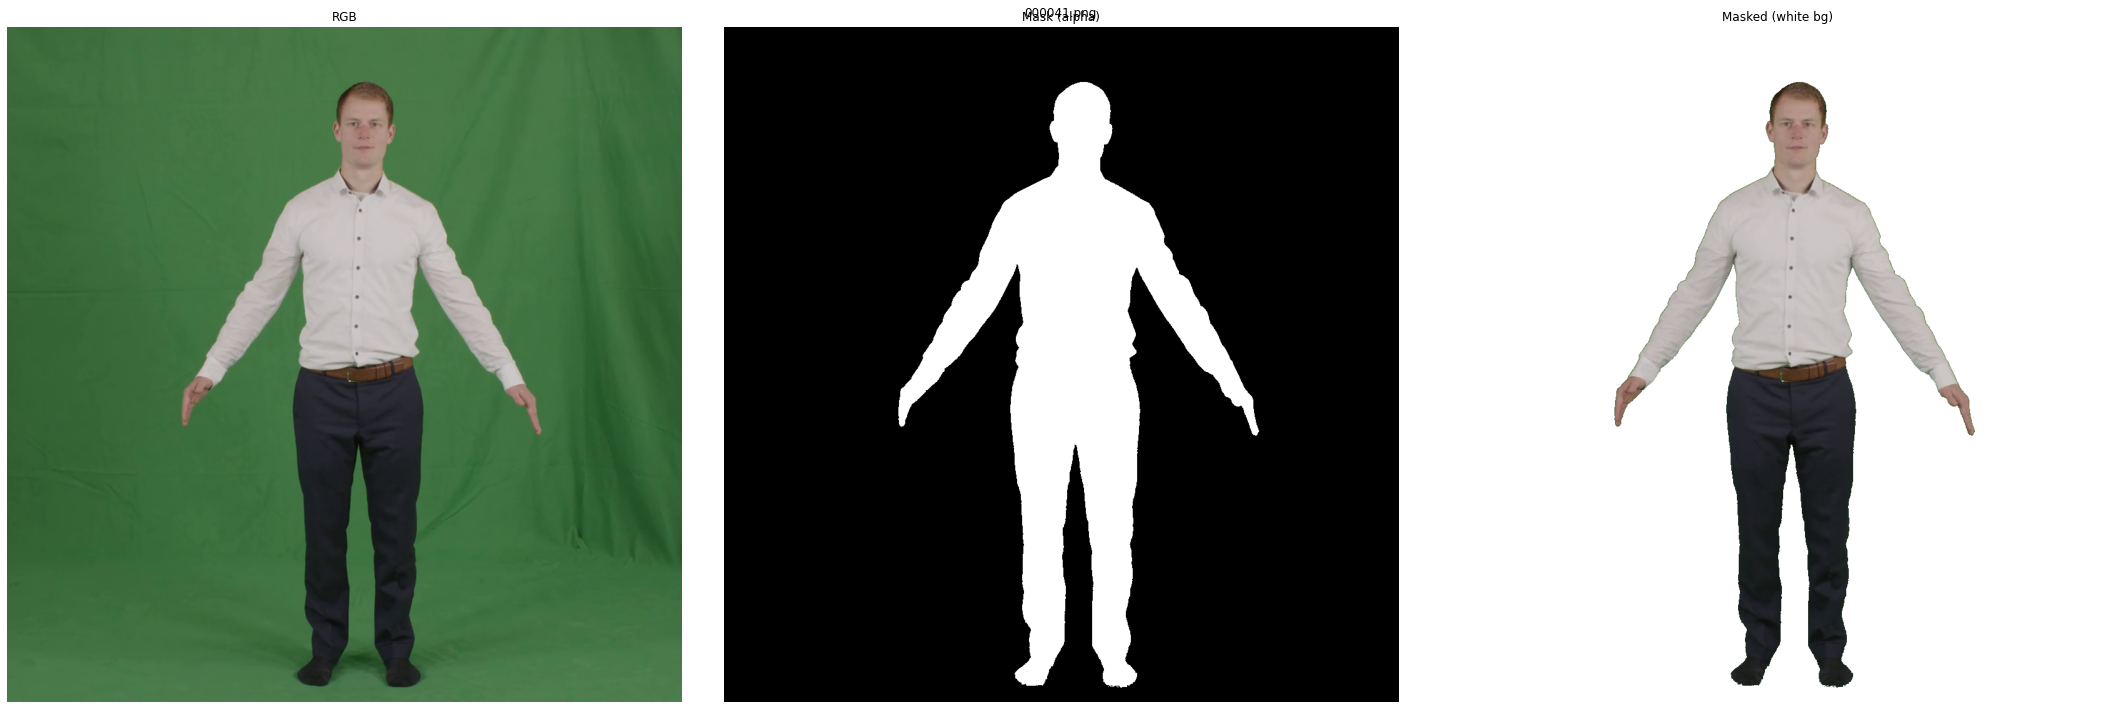

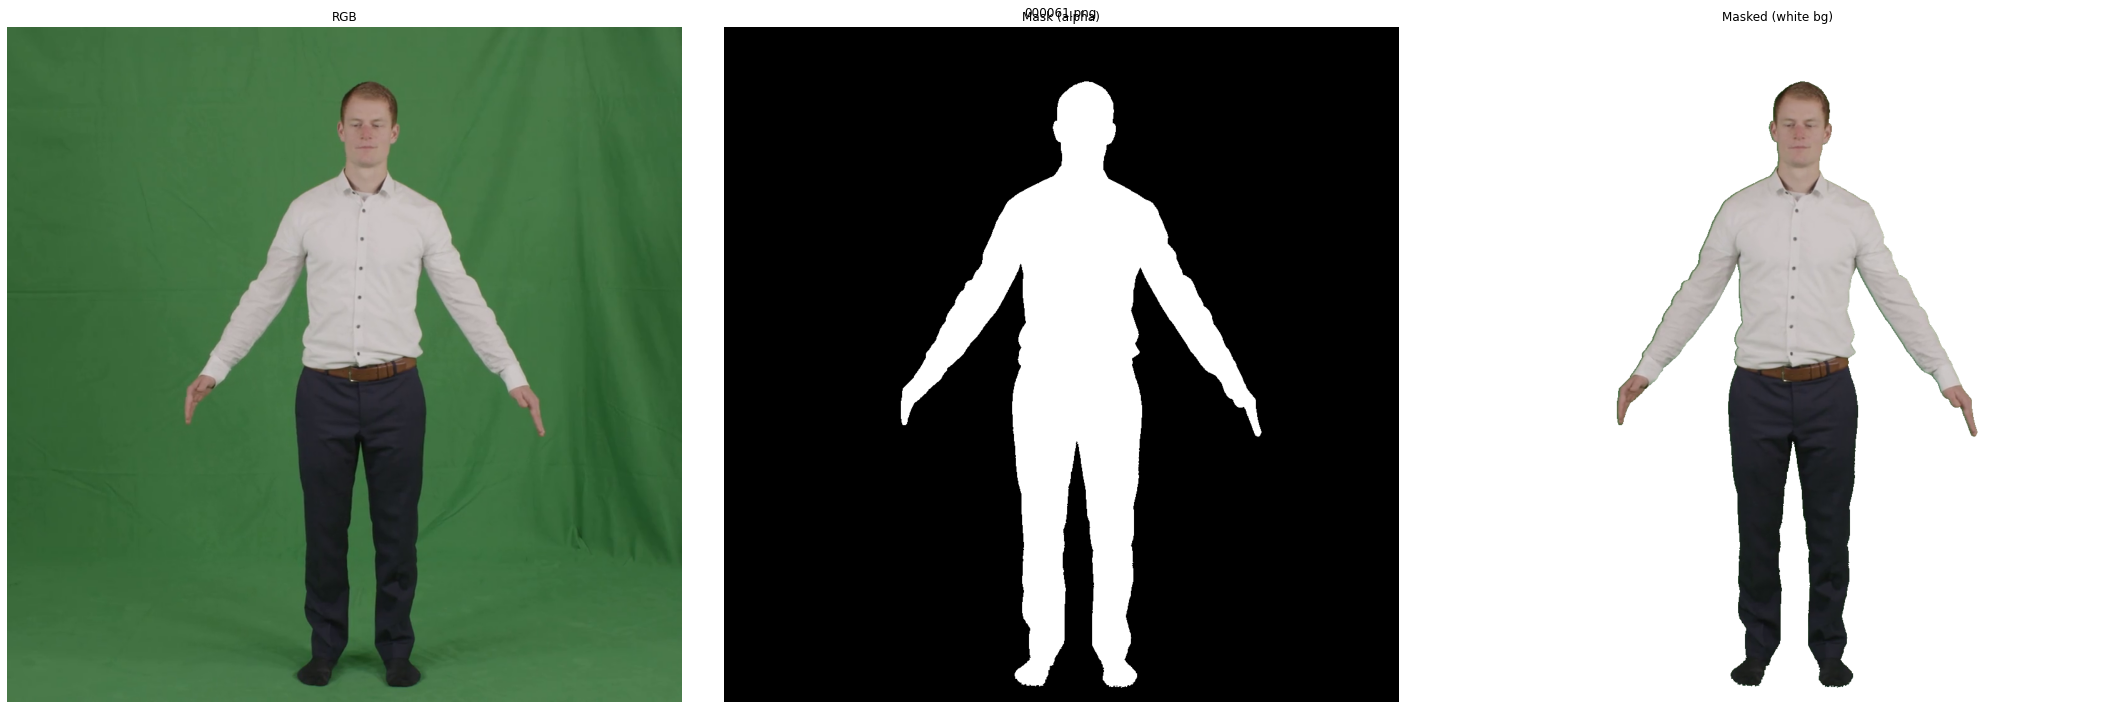

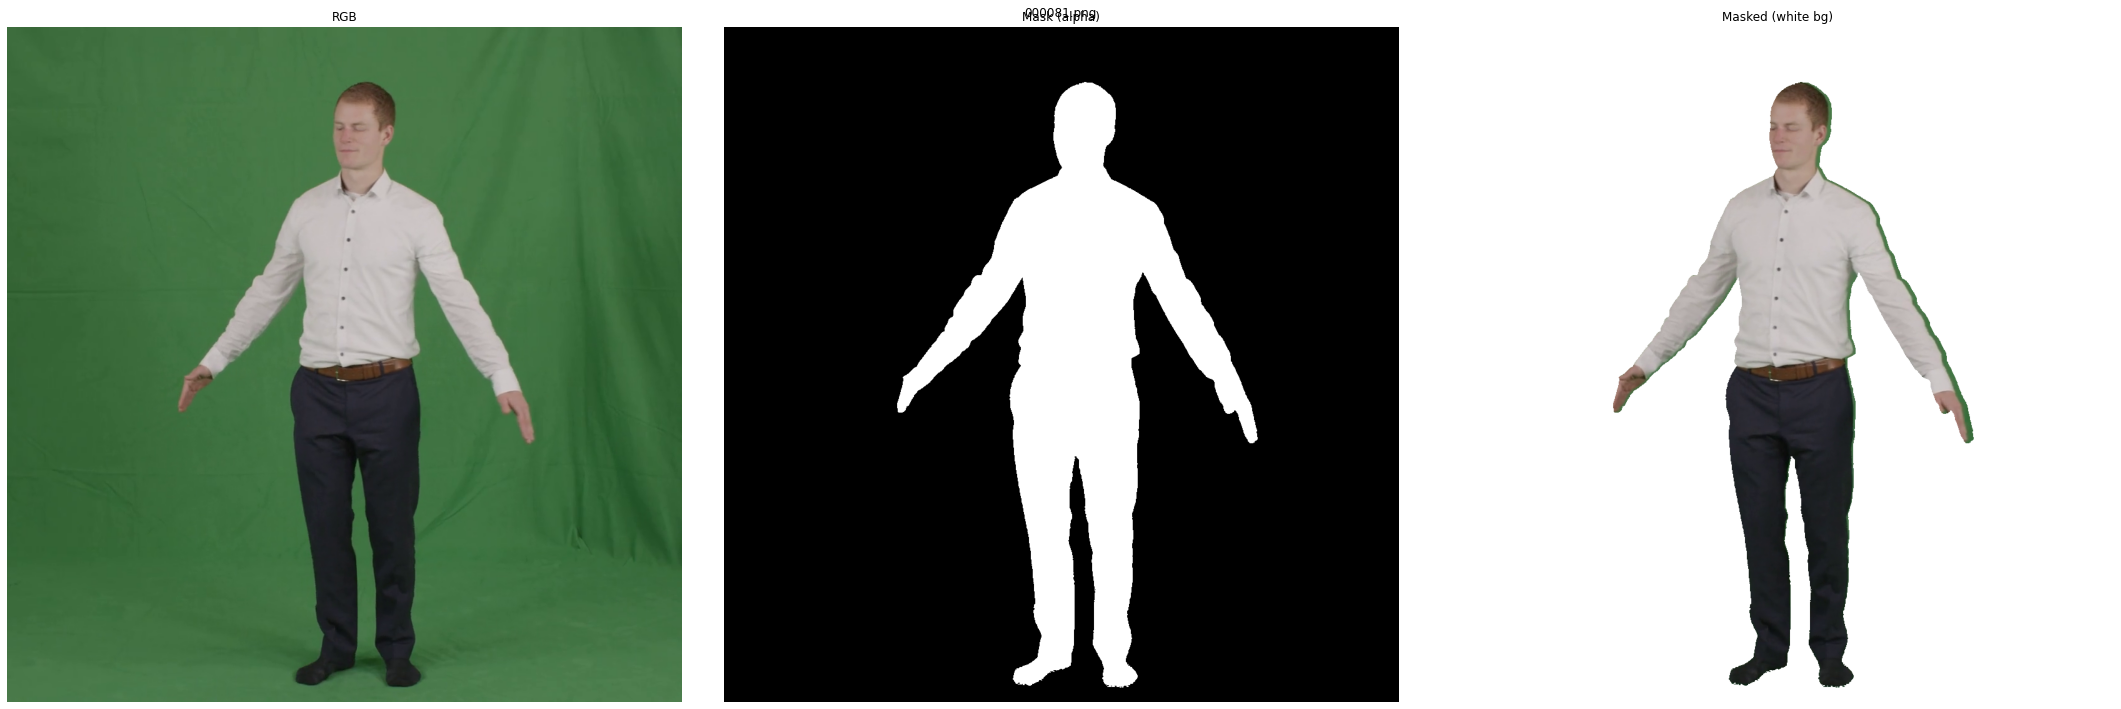

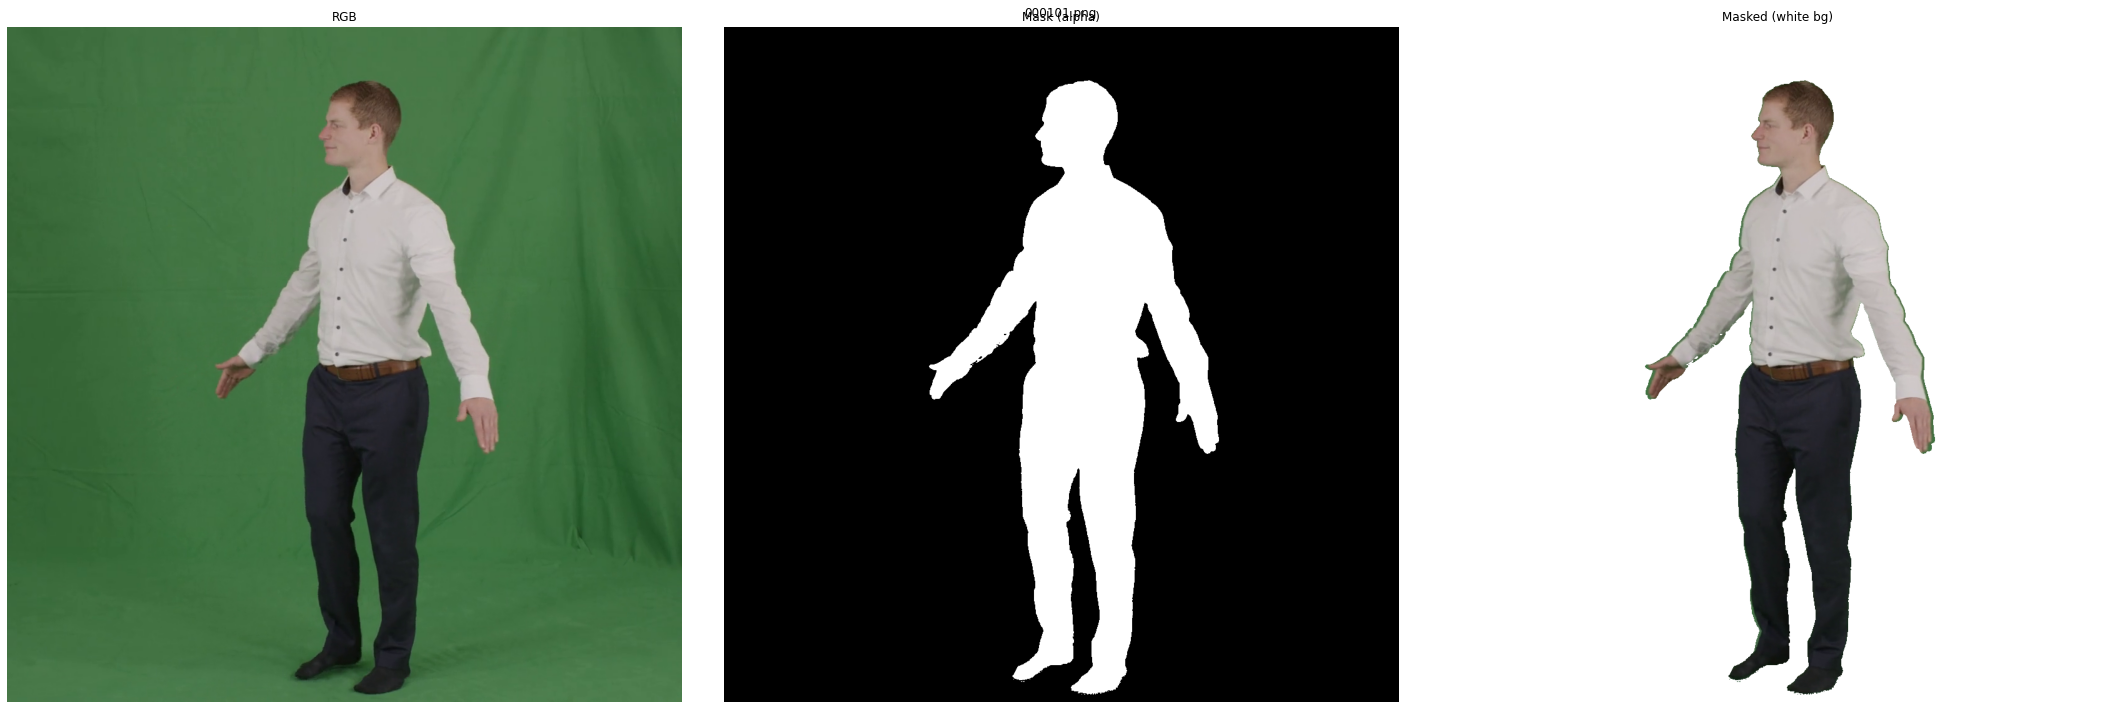

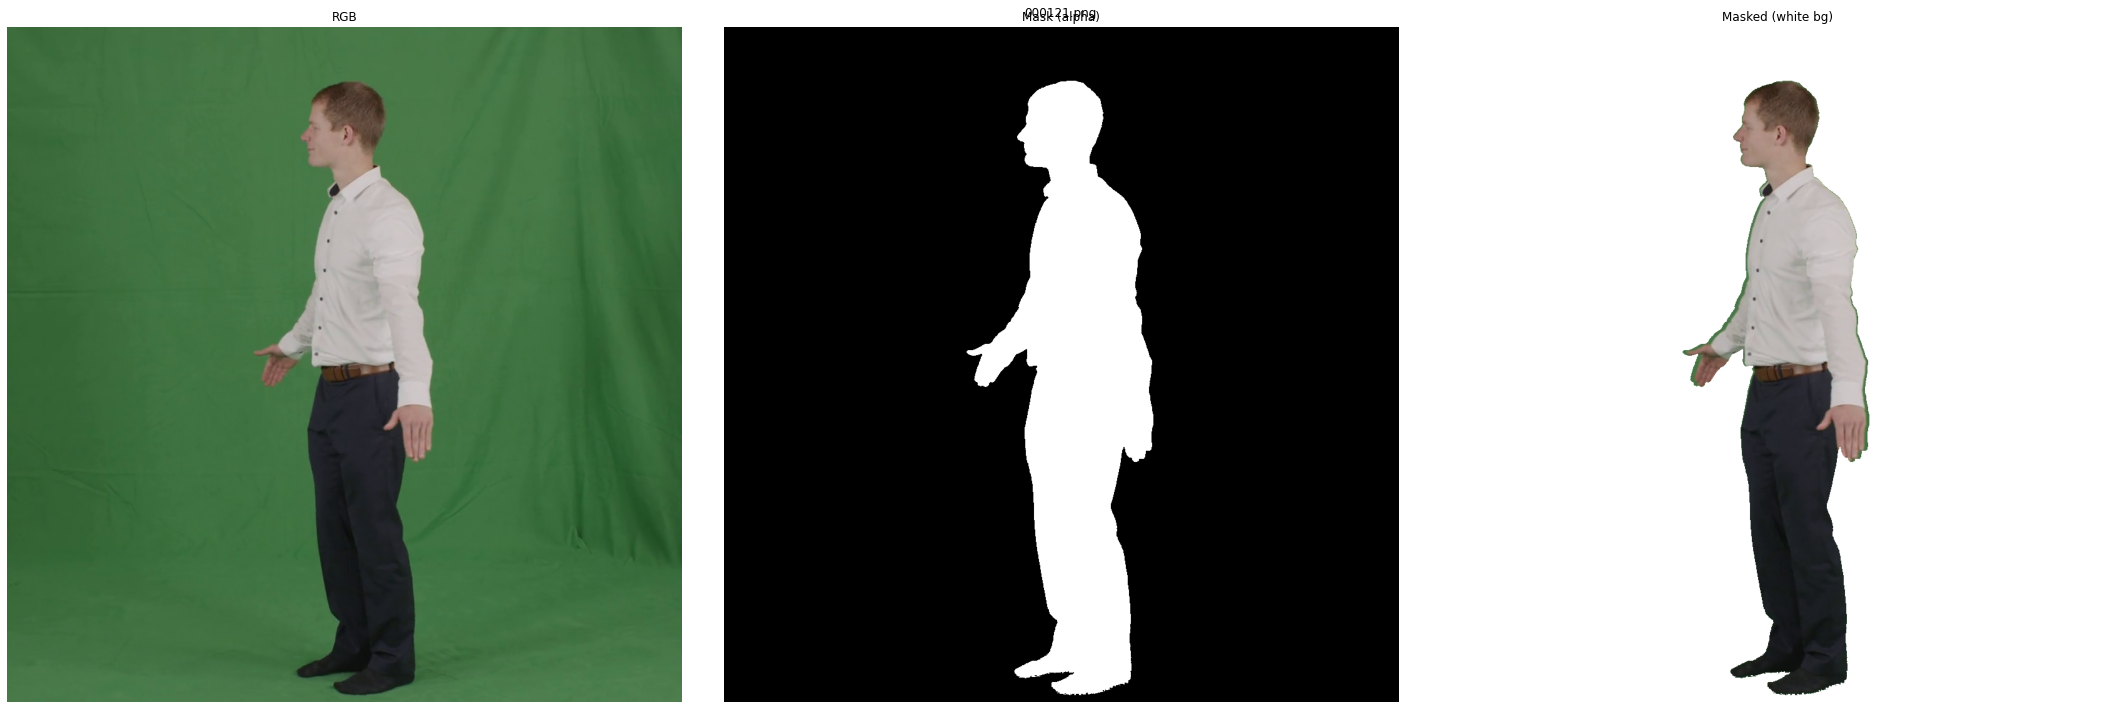

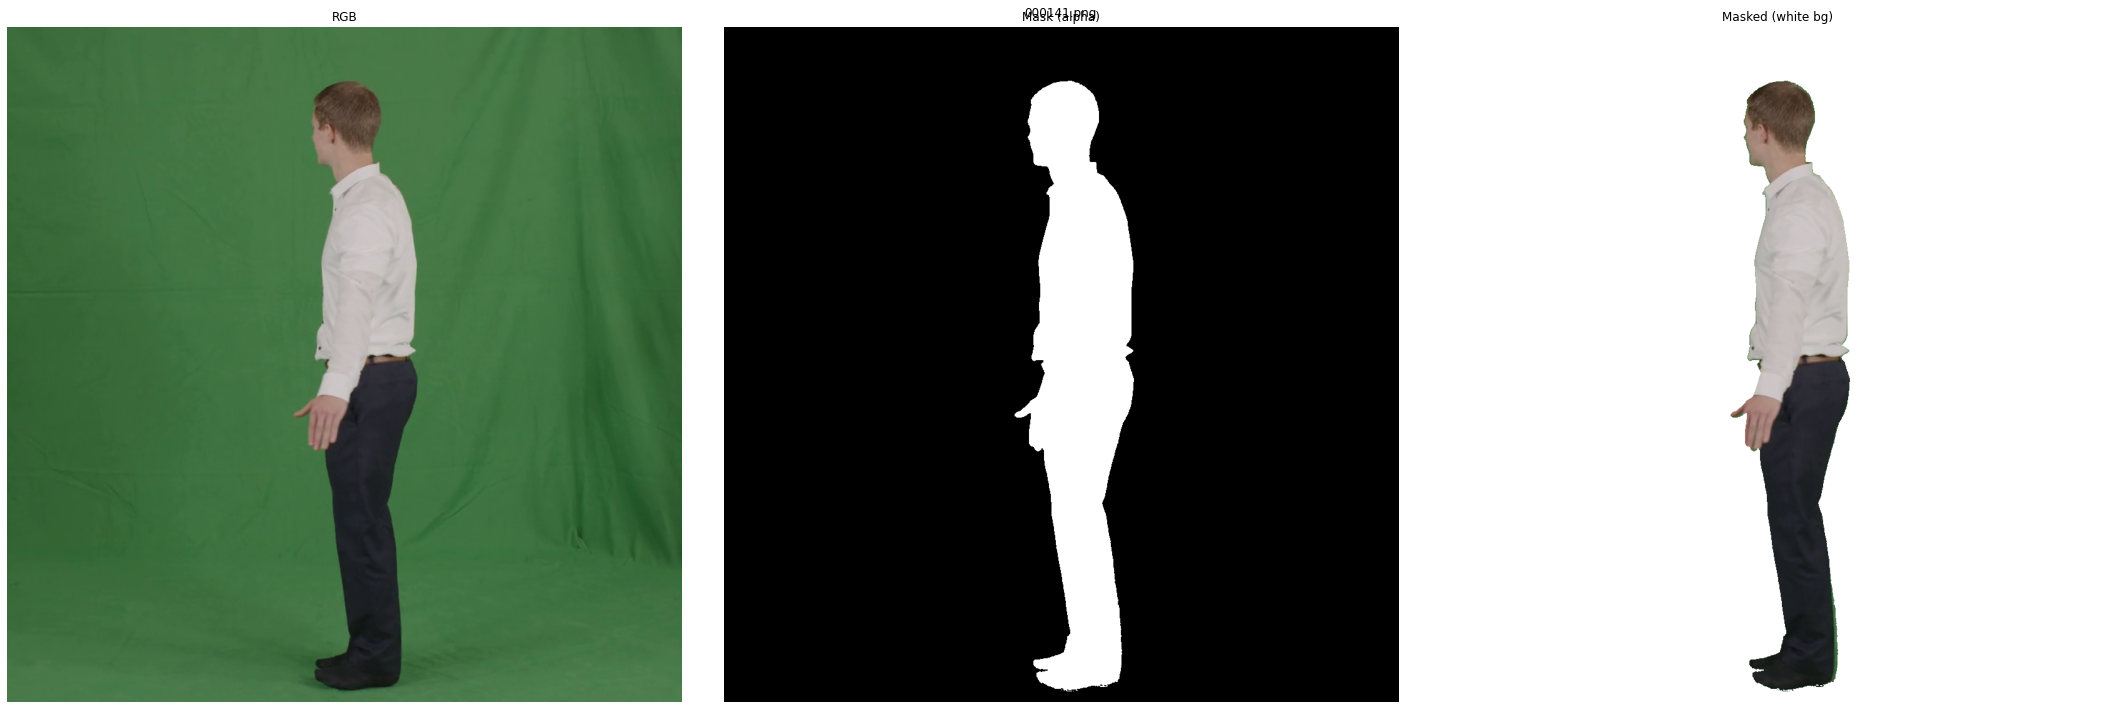

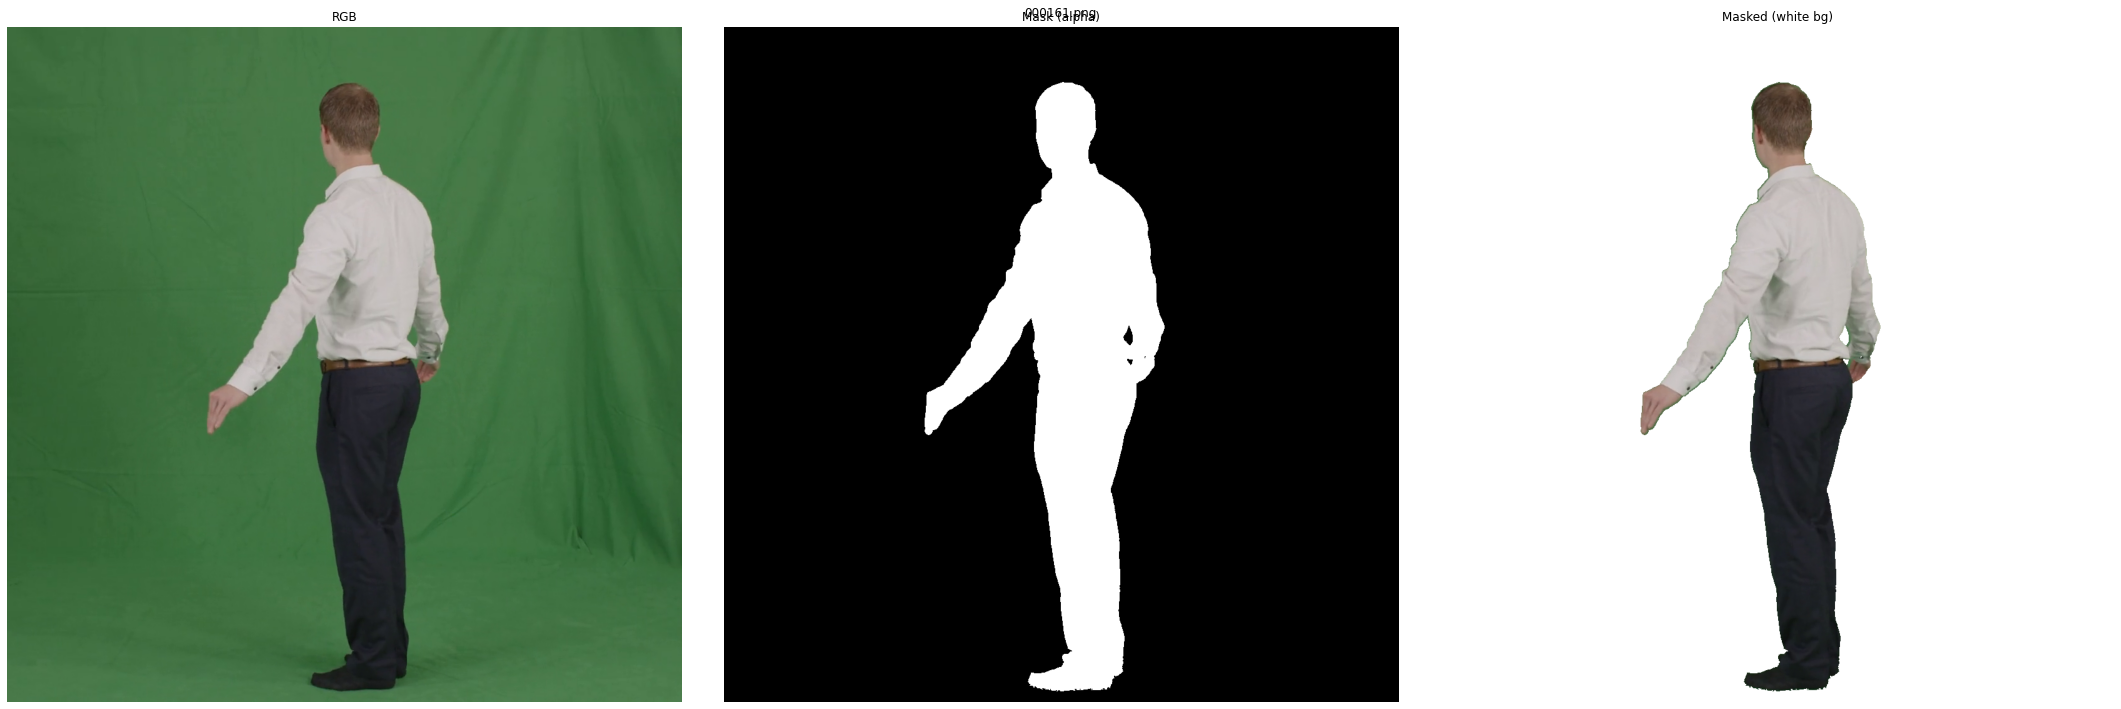

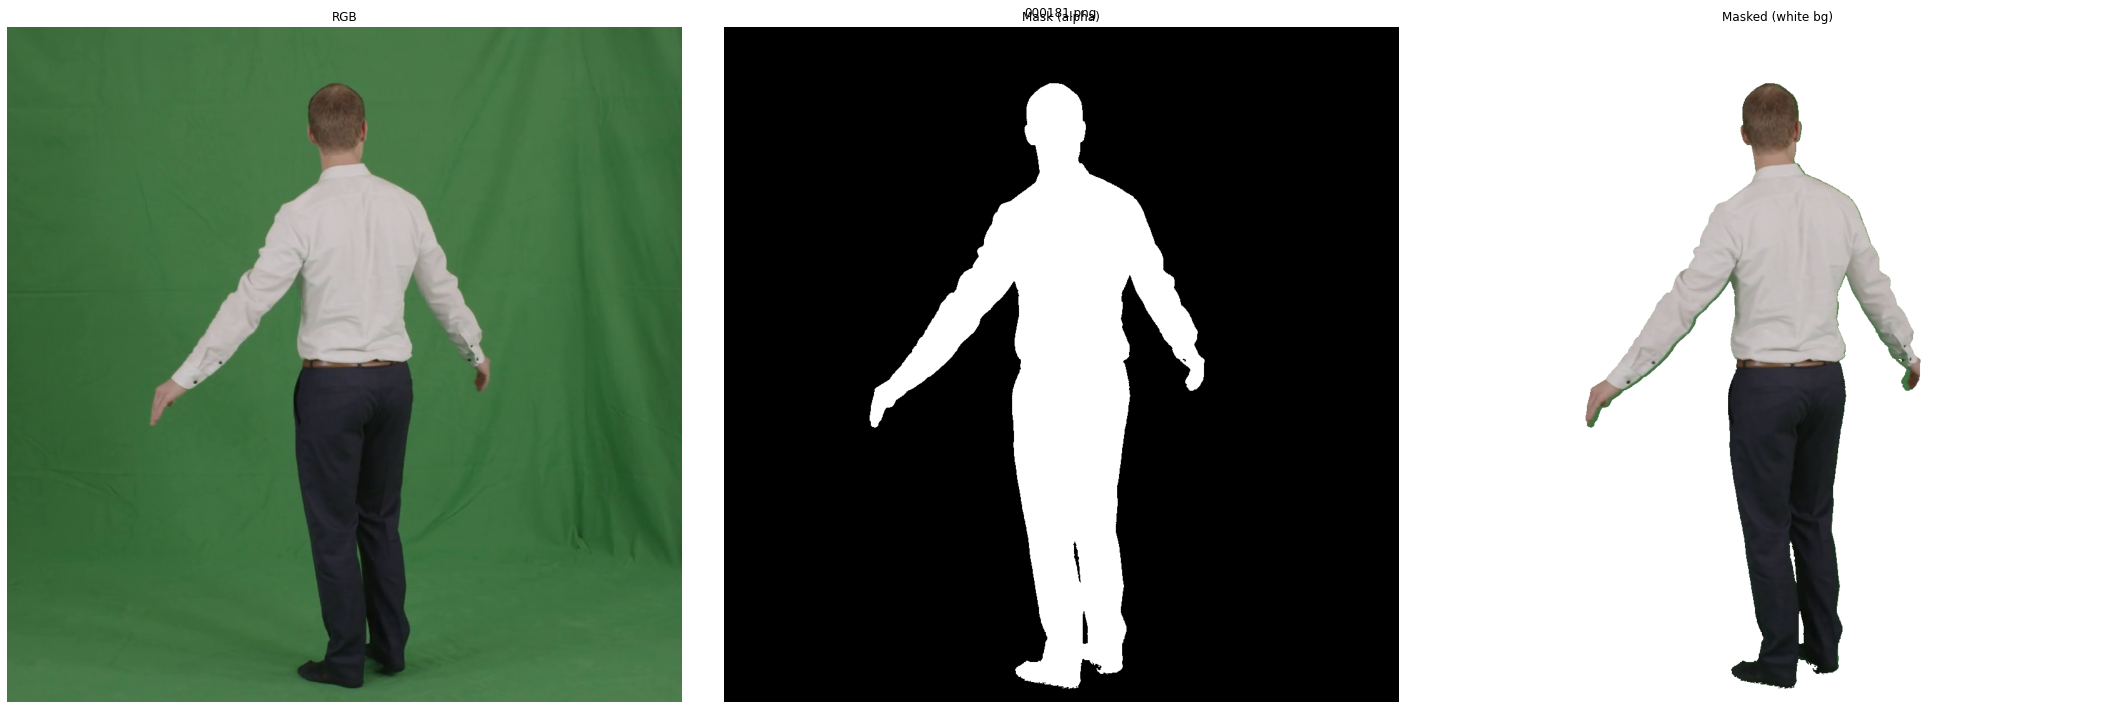

In [5]:
for path in paths[::20][:10]:
    img = Image.open(path).convert("RGBA")
    arr = np.array(img, dtype=np.float32)

    rgb = arr[:, :, :3]
    alpha = arr[:, :, 3:4] / 255.0  # normalize to [0, 1]

    # Composite over white background
    white_bg = np.full_like(rgb, 255.0)
    composited = rgb * alpha + white_bg * (1.0 - alpha)
    composited = composited.astype(np.uint8)

    fig, axes = plt.subplots(1, 3, figsize=(30, 10))

    axes[0].imshow(np.array(img)[:, :, :3])
    axes[0].set_title("RGB")

    axes[1].imshow(np.array(img)[:, :, 3], cmap="gray")
    axes[1].set_title("Mask (alpha)")

    axes[2].imshow(composited)
    axes[2].set_title("Masked (white bg)")

    for ax in axes:
        ax.axis("off")

    fig.suptitle(path.name, fontsize=12)
    plt.tight_layout()
    plt.show()

In [6]:
image_dir = Path("/home/ubuntu/a100-gaussian-avatar/sam3_wrapper/results")

extensions = {".png", ".tiff", ".tif", ".webp"}
paths = sorted(p for p in image_dir.iterdir() if p.suffix.lower() in extensions)
print(f"Found {len(paths)} images in {image_dir}")

Found 792 images in /home/ubuntu/a100-gaussian-avatar/sam3_wrapper/results


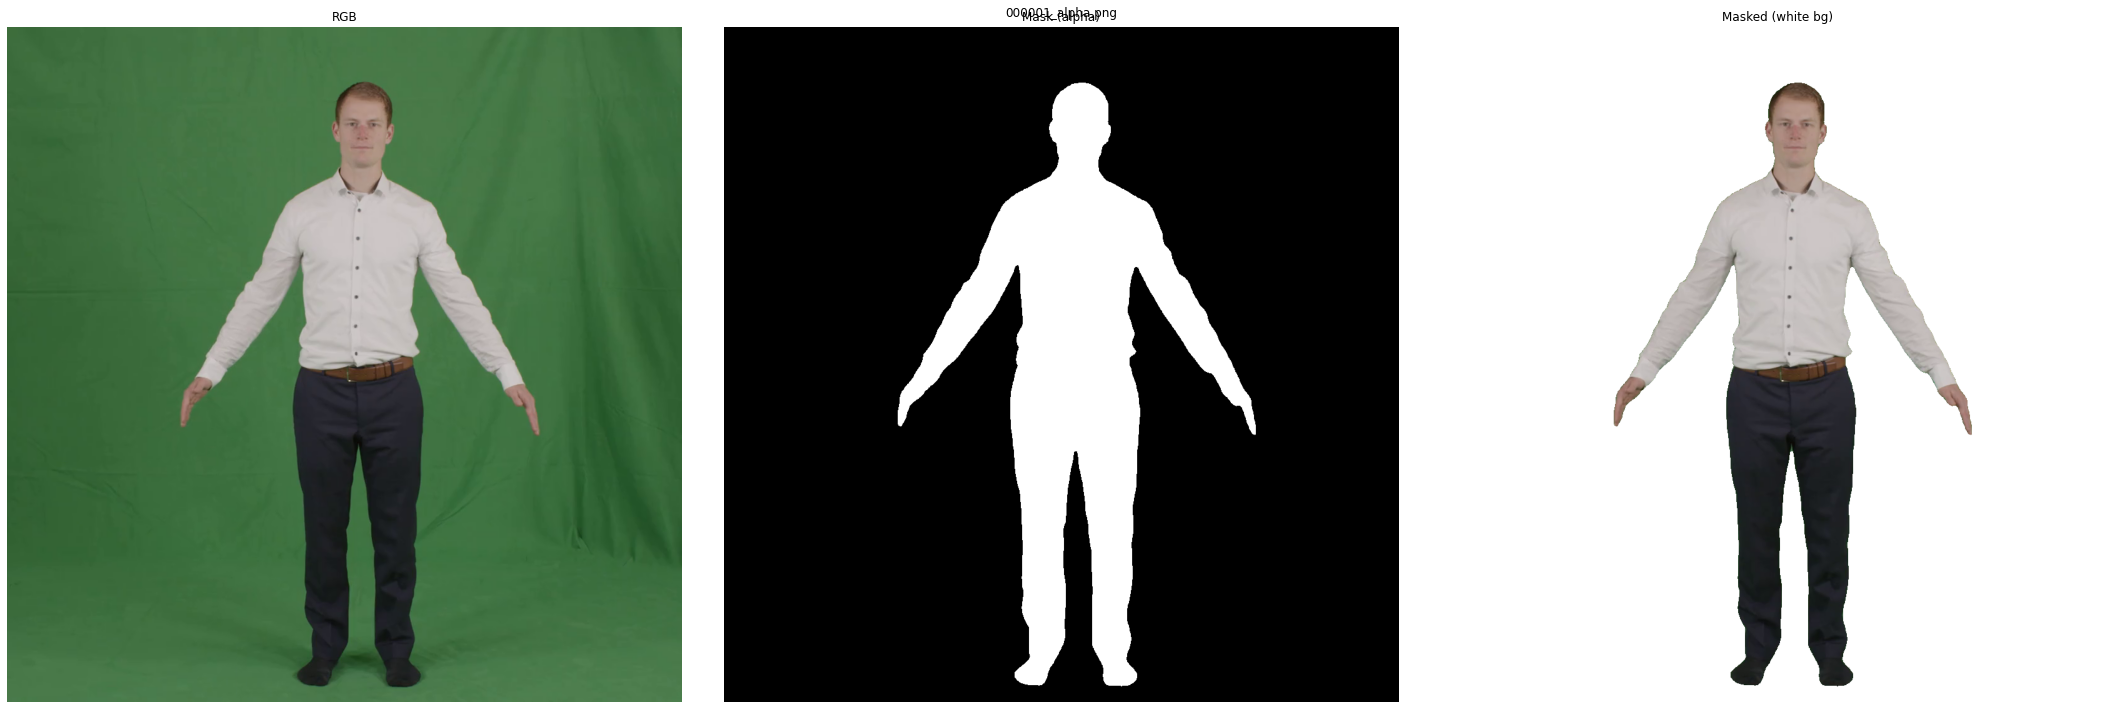

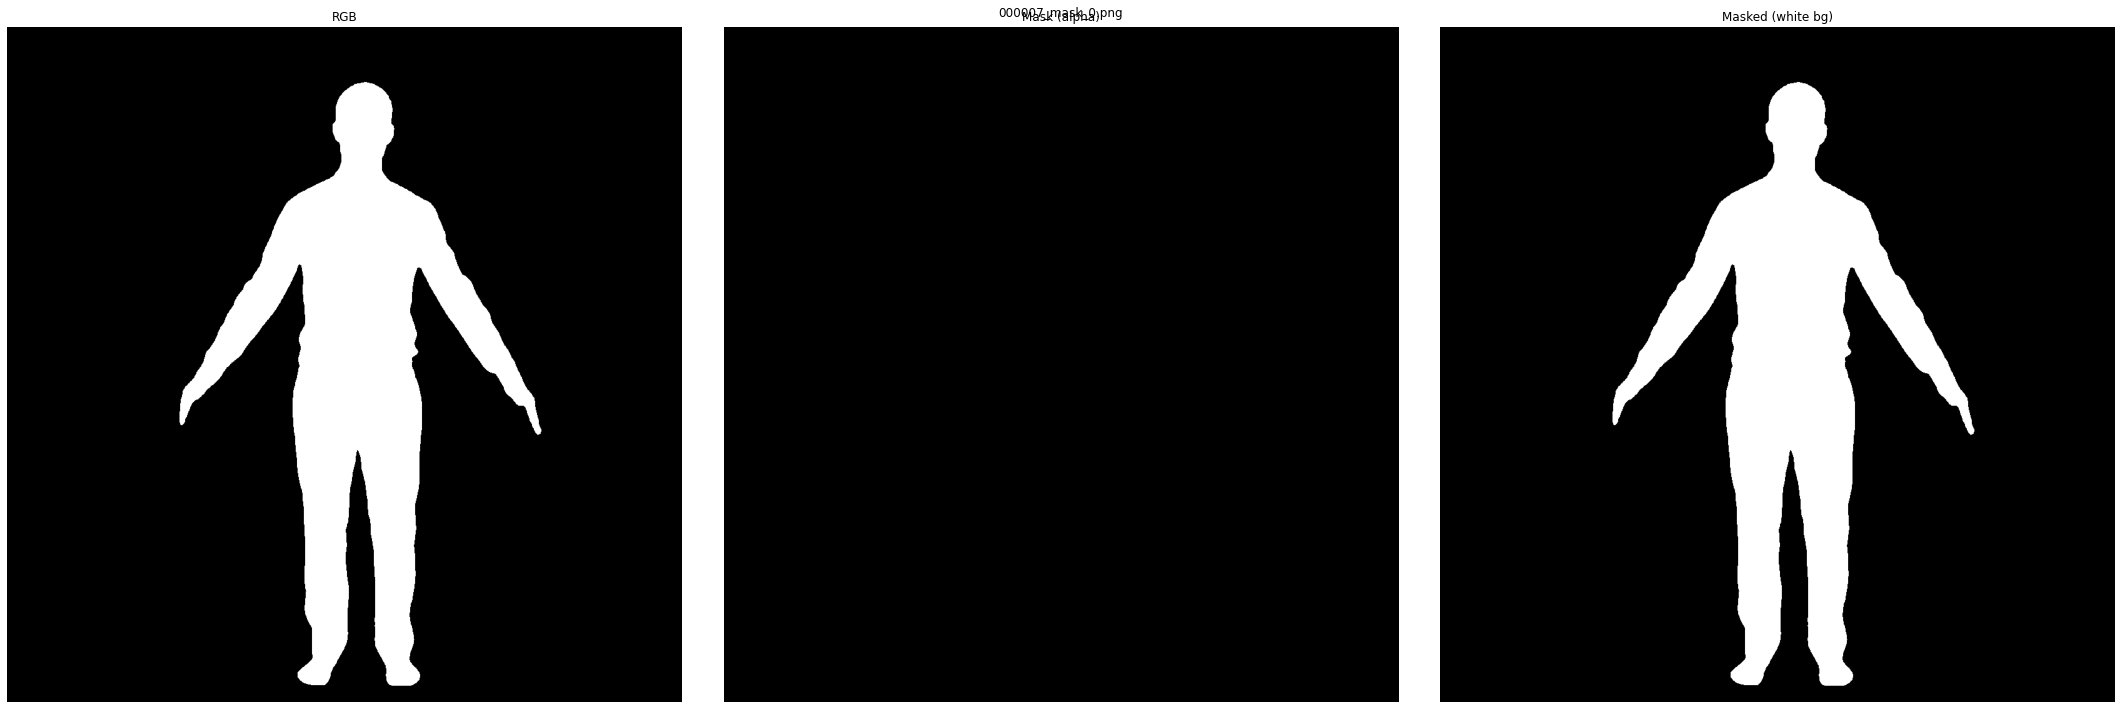

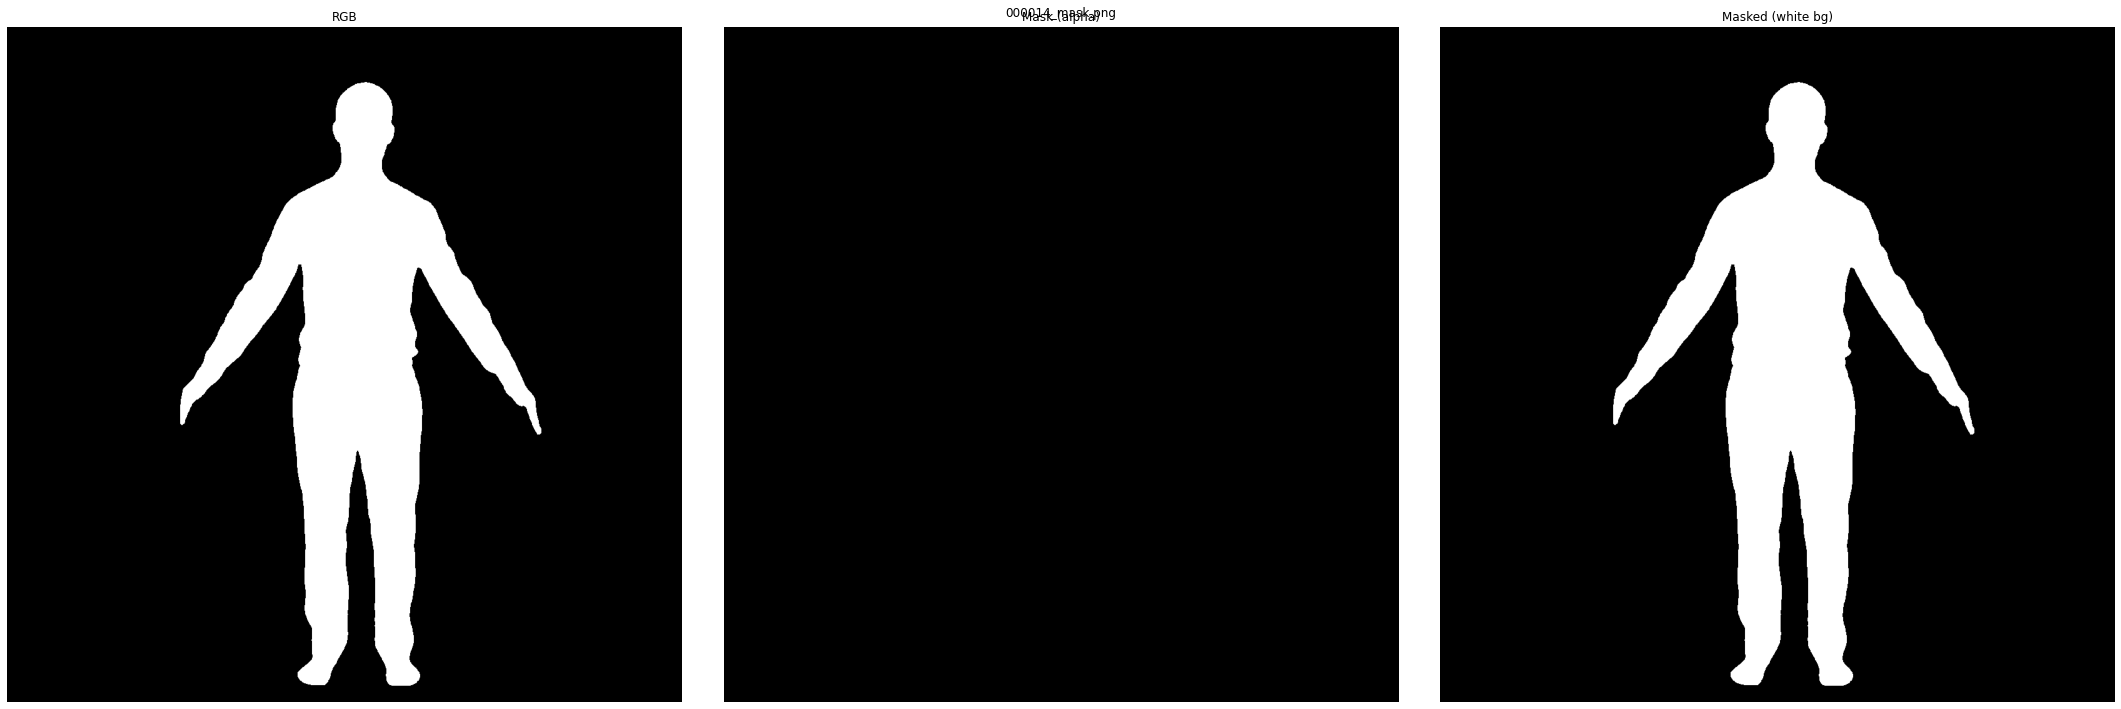

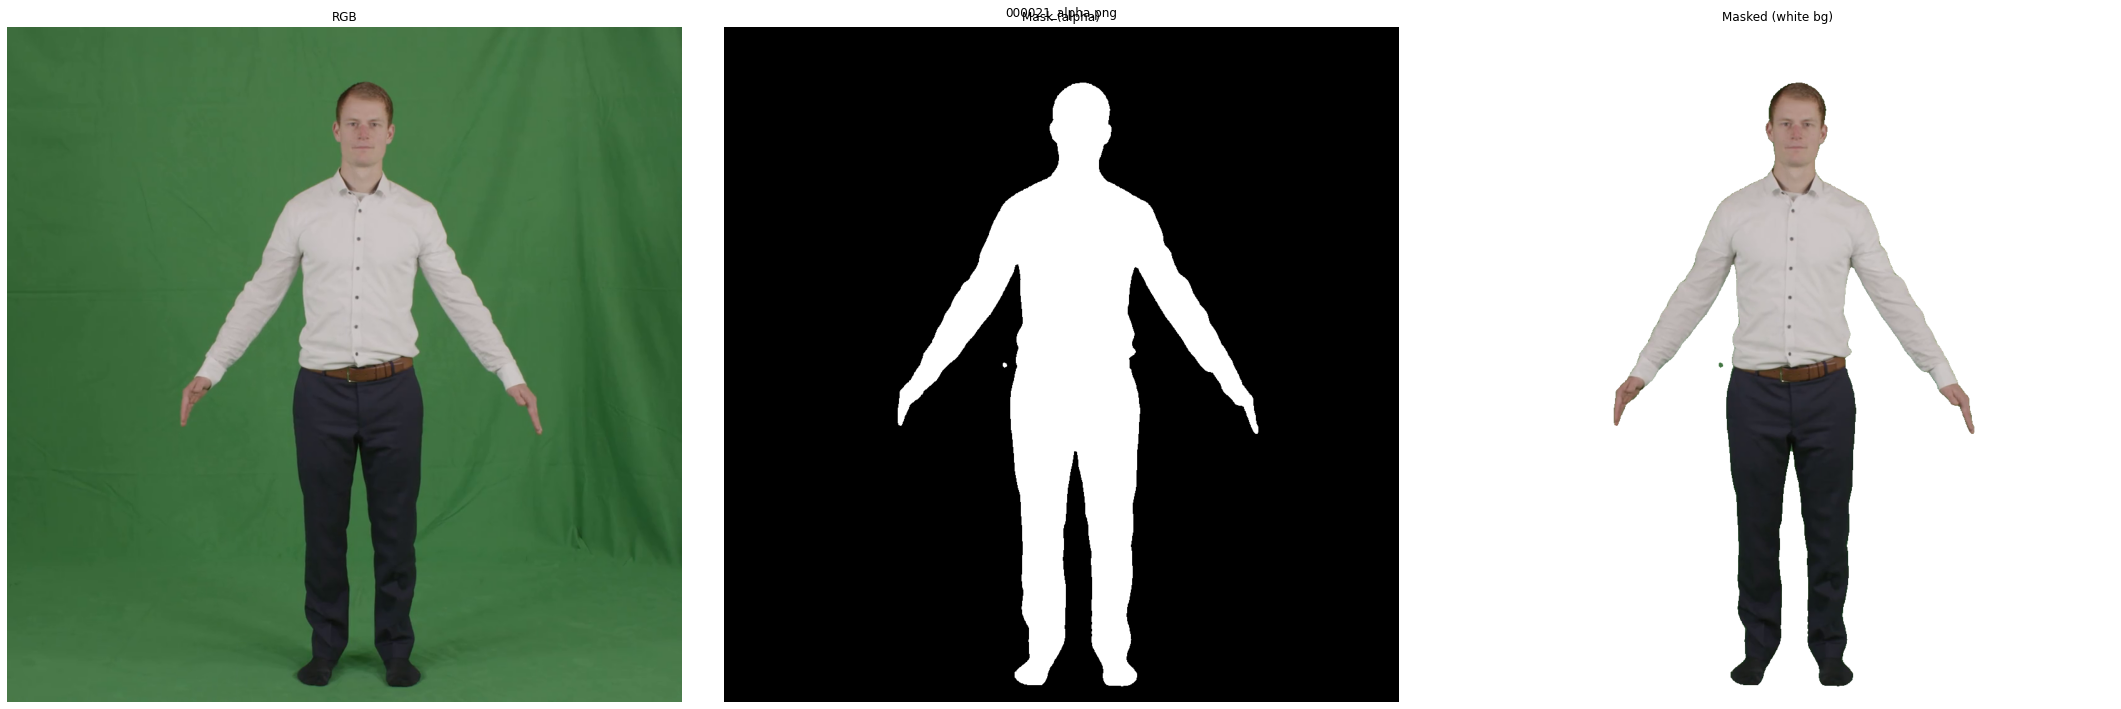

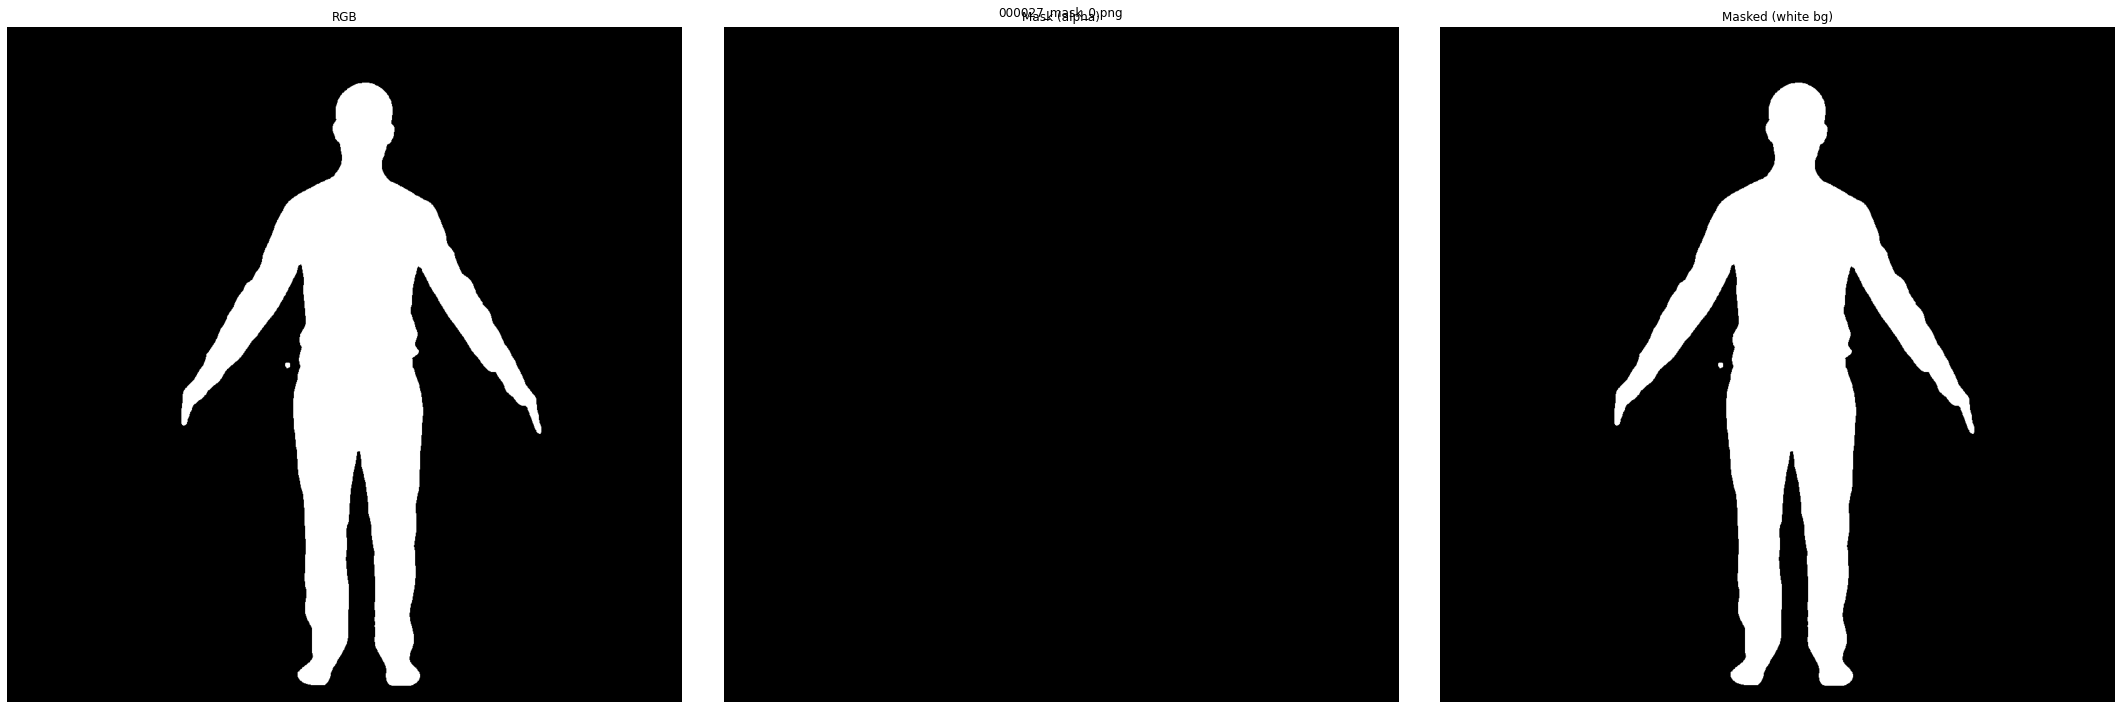

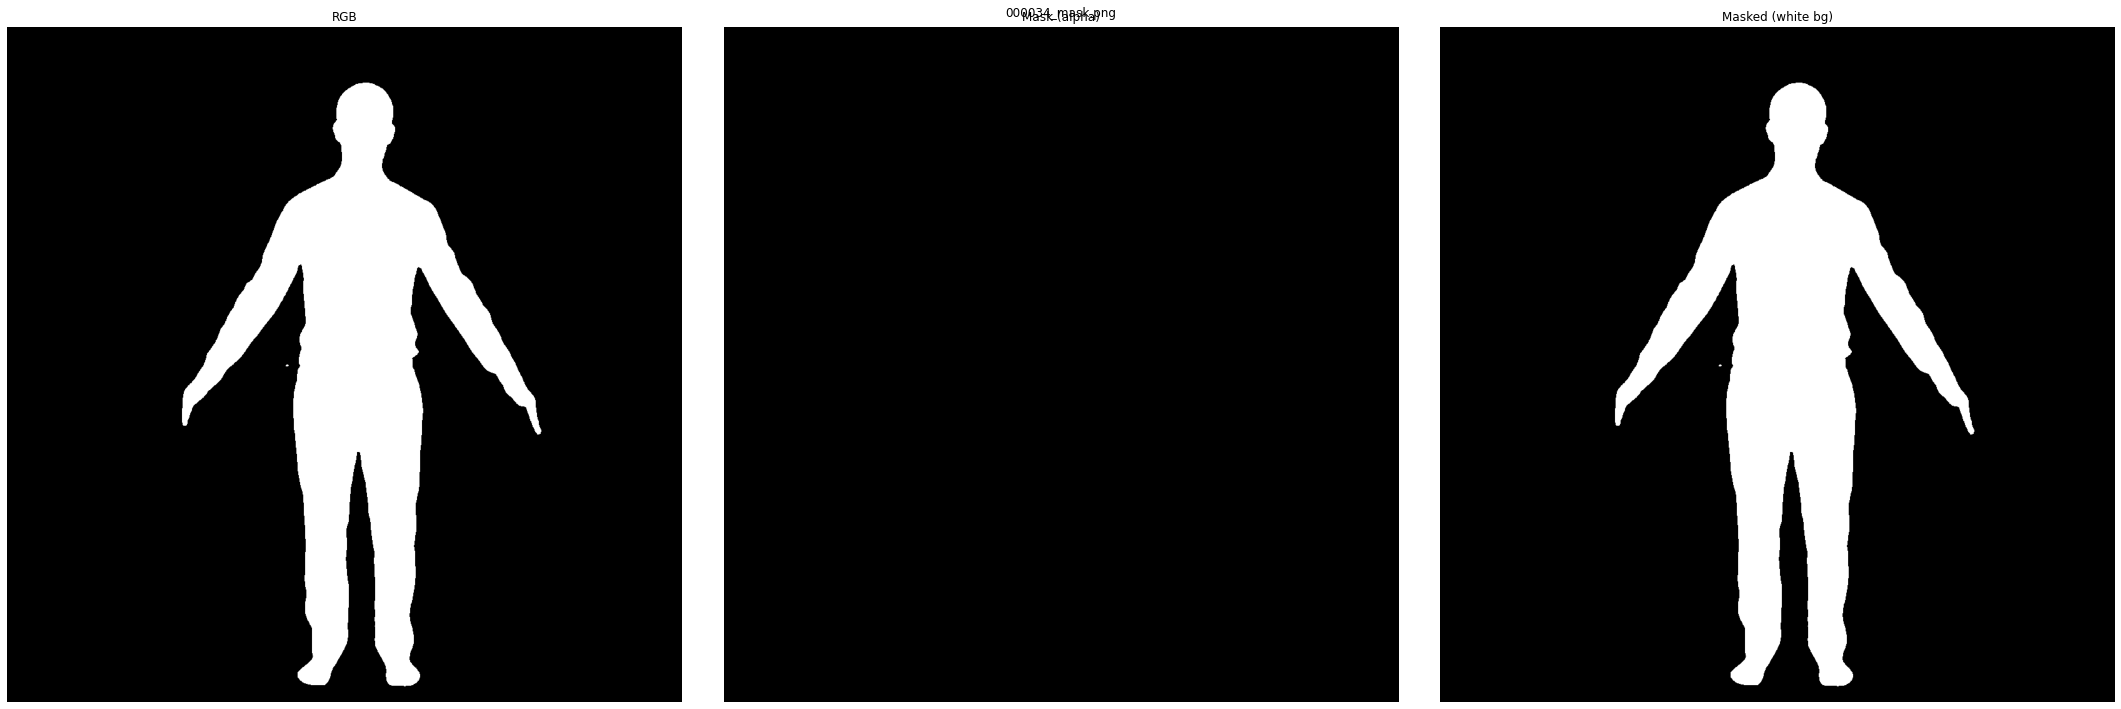

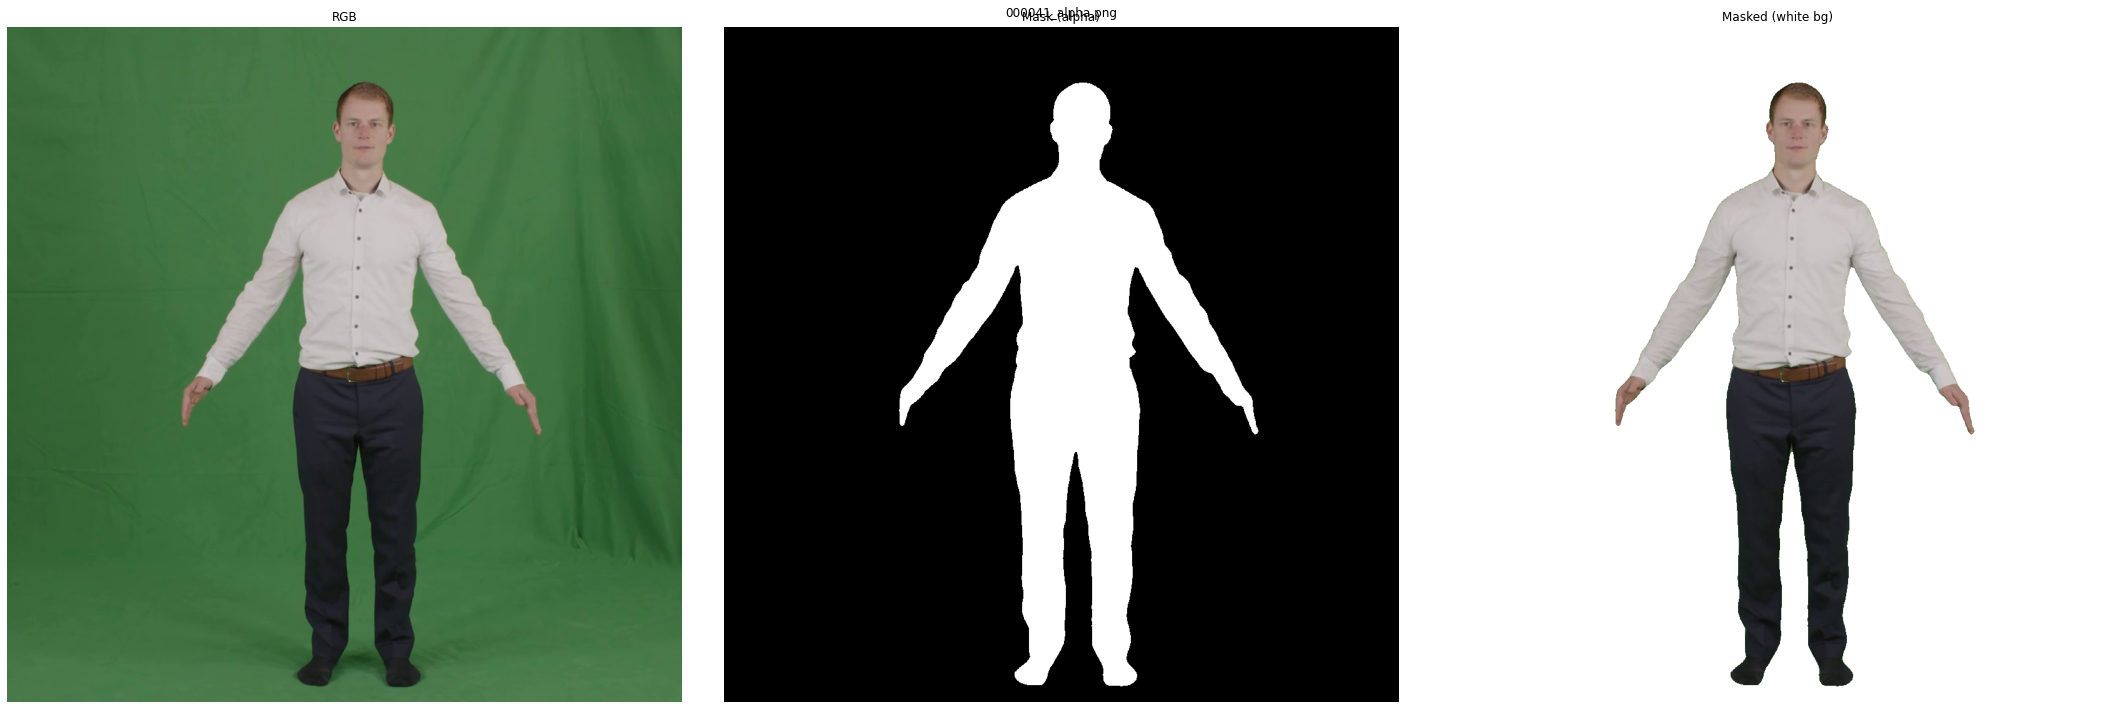

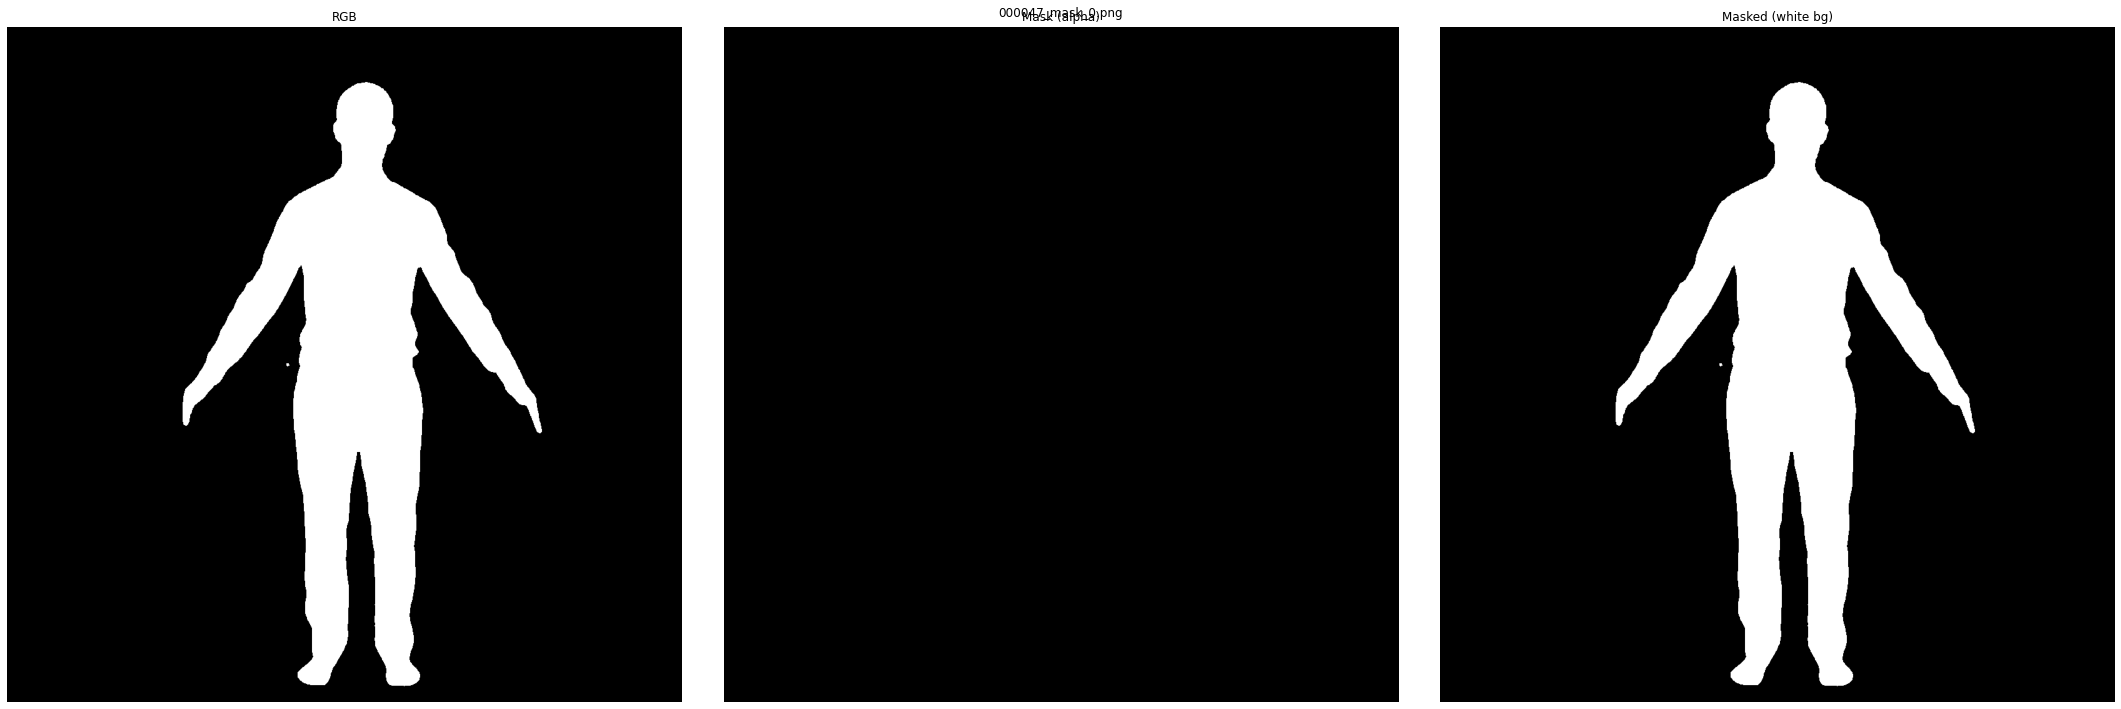

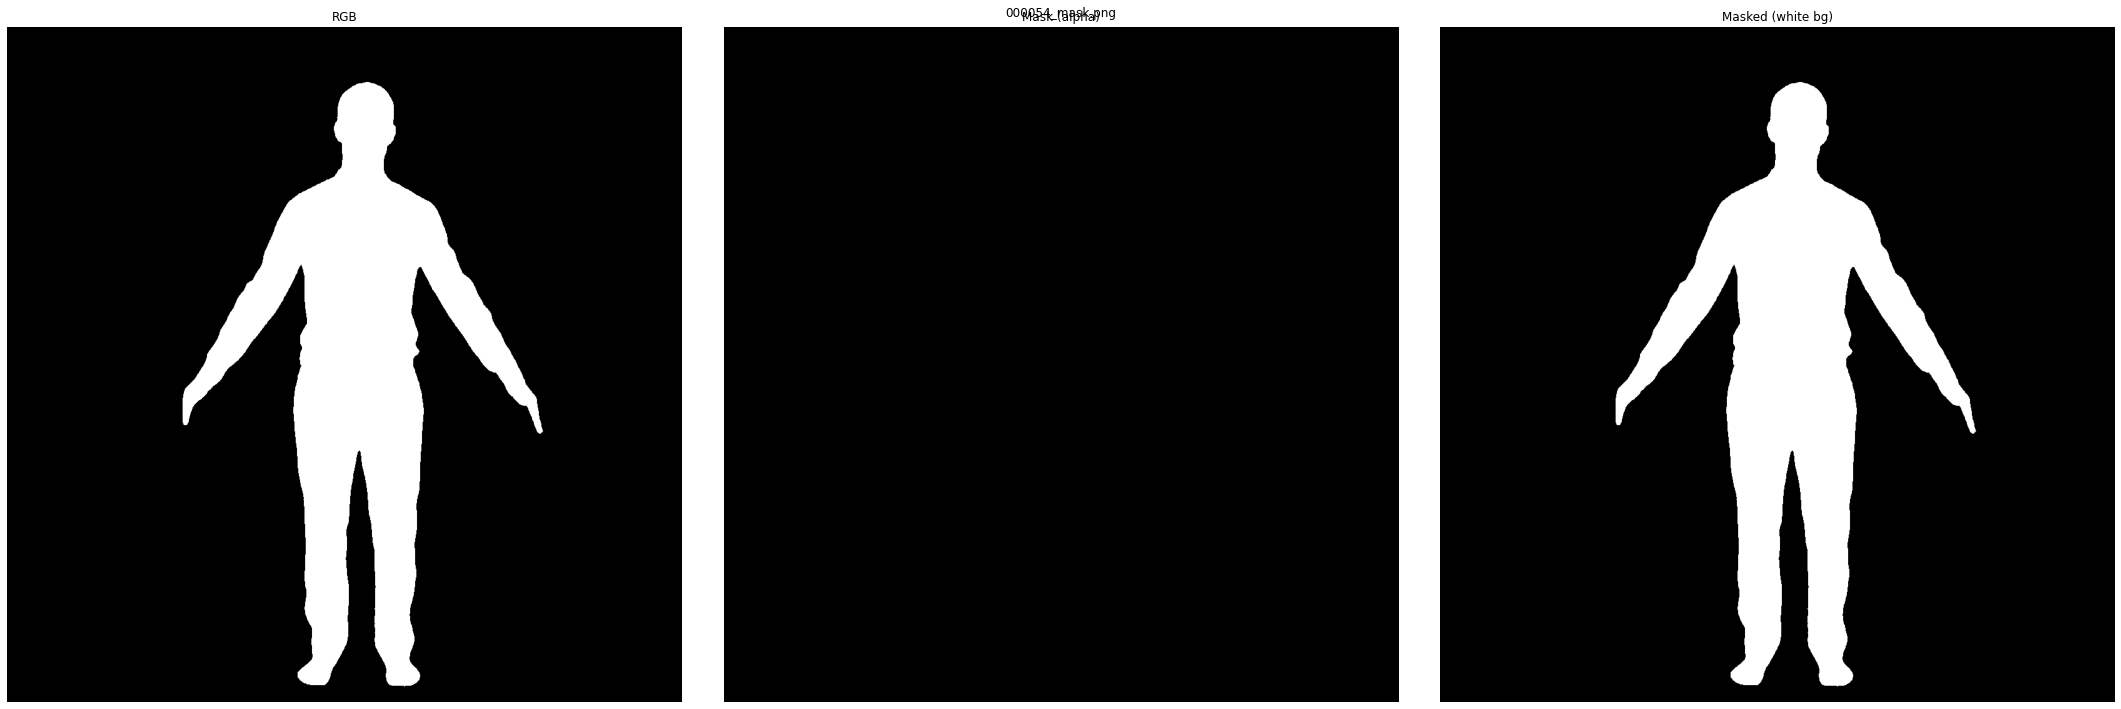

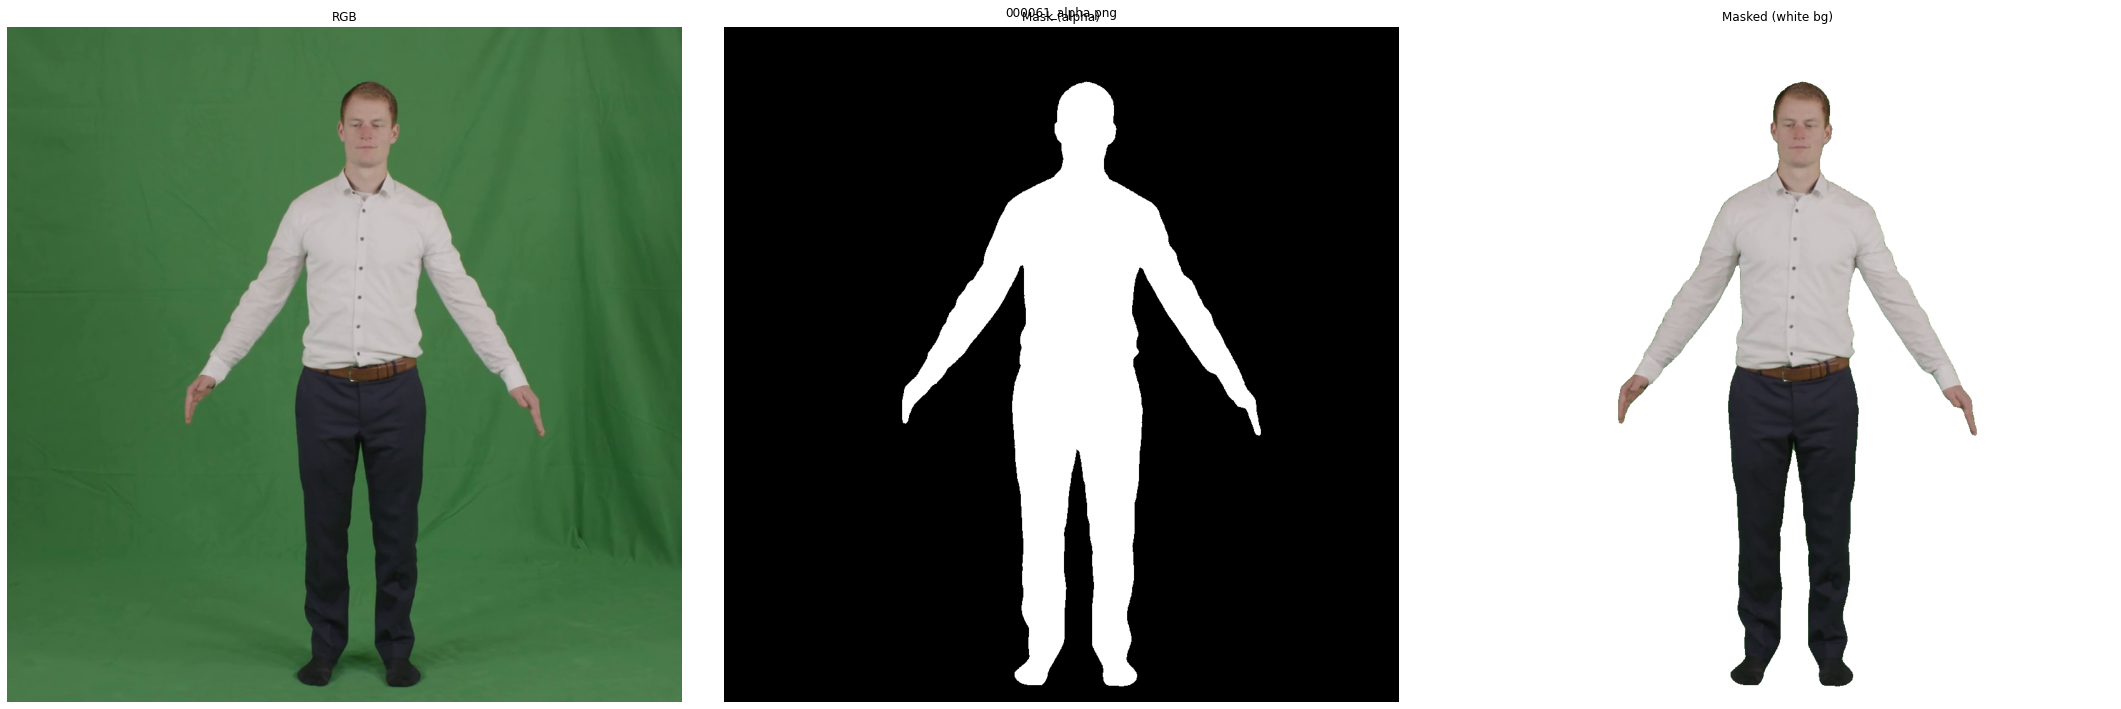

In [7]:
for path in paths[::20][:10]:
    img = Image.open(path).convert("RGBA")
    arr = np.array(img, dtype=np.float32)

    rgb = arr[:, :, :3]
    alpha = arr[:, :, 3:4] / 255.0  # normalize to [0, 1]

    # Composite over white background
    white_bg = np.full_like(rgb, 255.0)
    composited = rgb * alpha + white_bg * (1.0 - alpha)
    composited = composited.astype(np.uint8)

    fig, axes = plt.subplots(1, 3, figsize=(30, 10))

    axes[0].imshow(np.array(img)[:, :, :3])
    axes[0].set_title("RGB")

    axes[1].imshow(np.array(img)[:, :, 3], cmap="gray")
    axes[1].set_title("Mask (alpha)")

    axes[2].imshow(composited)
    axes[2].set_title("Masked (white bg)")

    for ax in axes:
        ax.axis("off")

    fig.suptitle(path.name, fontsize=12)
    plt.tight_layout()
    plt.show()